# GA 1.8: Multivariate Distributions

<h1 style="position: absolute; display: flex; flex-grow: 0; flex-shrink: 0; flex-direction: row-reverse; top: 60px;right: 30px; margin: 0; border: 0">
    <style>
        .markdown {width:100%; position: relative}
        article { position: relative }
    </style>
    <img src="https://gitlab.tudelft.nl/mude/public/-/raw/main/tu-logo/TU_P1_full-color.png" style="width:100px; height: auto; margin: 0" />
    <img src="https://gitlab.tudelft.nl/mude/public/-/raw/main/mude-logo/MUDE_Logo-small.png" style="width:100px; height: auto; margin: 0" />
</h1>
<h2 style="height: 10px">
</h2>

*[CEGM1000 MUDE](http://mude.citg.tudelft.nl/): Week 1.8, Friday Oct 25, 2024.*

## Objective

This notebook is structured in an identical way to WS 1.8. In particular, we have 3 main tasks:
1. Build a multivariate distribution $F_{X_1,X_2}(x_1,x_2)$
2. Use the distribution by comparing empirical probabilities to values computed with $F_{X_1,X_2}(x_1,x_2)$ for the AND, OR and function of random variable cases
3. Validate the distribution using the distribution of the function of random variables, $Z(X_1,X_2)$.

### Multivariate Distribution (Task 1)

As with WS 1.8, we will build a multivariate distribution, but this time we will include non-Gaussian marginal distributions using a Gaussian Copula:

$$
F_{X_1,X_2}(x_1,x_2) = C[F_{X_1}(x_1)F_{X_2}(x_2)]
$$

In this case, the Copula requires one parameter: the Pearson correlation coefficient, $\rho$.

This distribution has been implemented in the class `Bivariate` within `helper.py`. You can define an instance of the class using:
```
my_bivariate_dist = Bivariate(marginal_1, marginal_2, rho)
```
where the arguments are the marginal distributions for your random variables and are instances of the class `rv_continuous` from `scipy.stats`. In fact, the `Bivariate` class has been created with similar methods to `multivariate_normal`; in other words, you can use the methods `pdf`, `cdf` and `rvs` in the same way as `multivariate_normal` in WS 1.8.

Note that the function `plot_contours` will also work, but due to the way `Bivariate` is implemented, it is slow to make the plots, so you may want to use small sample sizes.

#### Python Package: `pyvinecopulib`

A package `pyvinecopulib` is required for the Bivariate class. It is only available on PyPI, so it has to be installed using `pip`. Fortunately you should already have done this as part of PA 1.8, so all you need to do is remember to use your environment `mude-week-8`.

### Probability Calculations for 3 Cases (Task 2)

For each data set, we will use the 90th percentile of each random variable to evaluate the AND, OR and function of random variable cases. In other words:

$$
x_{1,90} = F_{X_1}^{-1}(0.90) \;\;\textrm{and}\;\; x_{2,90} = F_{X_2}^{-1}(0.90)
$$

Since there were three data sets to choose from last week, each with different functions and variables, this notebook uses the notation $Z(X_1,X_2)$ to represent the function of random variables for your particular case. As we did in WS 1.8, we would like to evaluate $Z$ for a threshold condition (in WS 1.8 it was $Z<0$ for the Thingamajig). For this assignment, consider the threshold case to be all combinations of $x_1$ and $x_2$ such that:

$$
Z>Z(x_{1,90},z_{2,90})
$$

### Propagating Uncertainty (Task 3)

This proceeds as in WS 1.8 as well, where you will use the samples generated in Task 2 to evaluate the distribution of $Z$ and compare to the empirical data set.

<div style="background-color:#FAE99E; color: black; width: 95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
The cell below allows you to edit the contents of helper and incorporate the changes in the notebook without restarting the kernel.
</p>
</div>

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

from helper import plot_contour
from helper import Bivariate

<div style="background-color:#FAE99E; color: black; width: 95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
The cell below is only for the solution.
</p>
</div>

In [3]:
data_set = 'dataset_traffic'
N_factor_MCS = 100
make_figs = True
save_figs = False

bivariate_lim = [0, 250, -20, 100]

plot_x2 = lambda x1, z90: (z90 - 143*x1)/469
Z = lambda x1, x2: 143*x1 + 469*x2

## Part 1: Creating a Bivariate Distribution

We need to represent our two dependent random variables with marginal distributions and use the correlation coefficient to model dependence, as found previously in GA 1.7.

<div style="background-color:#AABAB2; color: black; width: 95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 1.1:</b>   

Import your data set from last week and define the marginal distributions as frozen scipy stats objects.

<em>The cell below illustrates how to create a frozen Gaussian distribution</em> 
</p>
</p>
</div>

<div style="background-color:#FAE99E; color: black; width: 95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
Remember there is a <a href="https://mude.citg.tudelft.nl/2024/book/probability/python.html" target="_blank">new page on scipy stats in the book</a> in case you need a reference.
</p>
</div>

In [4]:
# YOUR_CODE_HERE # many lines
# parameters1 = st.norm.fit_loc_scale(data_x1)
# dist_x1 = st.norm(*parameters1)

In [5]:
data_path = "data/dataset_traffic.csv"

data = np.genfromtxt(data_path,
                     delimiter=",",
                     unpack=True,
                     skip_header=True)
# first is C, then H
data_x1 = np.array(data[0,:])
data_x2 = np.array(data[1,:])

parameters1 = st.uniform.fit_loc_scale(data_x1)
dist_x1 = st.norm(*parameters1)

parameters2 = st.norm.fit_loc_scale(data_x2)
dist_x2 = st.gumbel_r(*parameters2)

N = len(data_x1)
print(f'shape of data: {data.shape}')
print(f'shape of data_x1: {data_x1.shape}')
print(f'min/max of data_x1: {data_x1.min()}, {data_x1.max()}')
print(f'shape of data_x2: {data_x2.shape}')
print(f'min/max of data_x2: {data_x2.min()}, {data_x2.max()}')
print('\n')
print('mean and std of X1 and X2: ')
print(data_x1.mean(), data_x1.std())
print(data_x2.mean(), data_x2.std())

shape of data: (2, 2976)
shape of data_x1: (2976,)
min/max of data_x1: 6.0, 180.0
shape of data_x2: (2976,)
min/max of data_x2: 0.0, 68.0


mean and std of X1 and X2: 
68.69657258064517 45.842988981854475
30.604502688172044 12.317805263113748


<div style="background-color:#AABAB2; color: black; width: 95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 1.2:</b>   
Compute the covariance and correlation coefficient between the two random variables. Print the results.
</p>
</div>

In [6]:
# YOUR_CODE_HERE # many lines

In [7]:
def calculate_covariance(X1, X2):
    '''
    Covariance of two random variables X1 and X2 (numpy arrays).
    '''
    mean_x1 = X1.mean()
    mean_x2 = X2.mean()
    diff_x1 = X1 - mean_x1
    diff_x2 = X2 - mean_x2
    product = diff_x1 * diff_x2
    covariance = product.mean()
    return covariance

def pearson_correlation(X1, X2):
    covariance = calculate_covariance(X1, X2)
    correl_coeff = covariance/(X1.std()*X2.std())
    return correl_coeff

cov_x12 = calculate_covariance(data_x1, data_x2)
print(f'The covariance of X1 and X2 is {cov_x12:.5f}')
rho_x12 = pearson_correlation(data_x1, data_x2)
print(f'The correlation coefficient of X1 and X2 is {rho_x12:.5f}')

The covariance of X1 and X2 is 150.24962
The correlation coefficient of X1 and X2 is 0.26608


<div style="background-color:#AABAB2; color: black; width: 95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 1.3:</b>   
Build the bivariate distribution by instantiating the <code>Bivariate</code> class in <code>helper.py</code> (and described above). To validate the result, create a plot that shows contours of the joint PDF, compared with the data (see note below). Include the data in your plot and write a few comments on the quality of the fit for use in your Report.
</p>
</div>

<div style="background-color:#facb8e; color: black; width: 95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px"> <p>Use the helper function <code>plot_contour</code> in <code>helper.py</code>; it works exactle the same as in WS 1.8.</em></p></div>

In [8]:
# plot_contour? # uncomment and run to read docstring

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='$X_1$', ylabel='$X_2$'>)

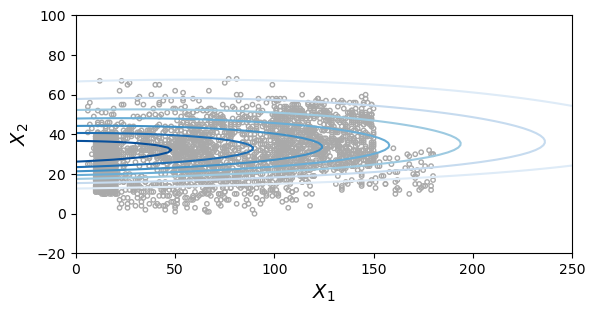

In [9]:
# bivar_dist = Bivariate(YOUR_CODE_HERE, YOUR_CODE_HERE, YOUR_CODE_HERE)

# plot_contour(YOUR_CODE_HERE, YOUR_CODE_HERE, data=data)

# SOLUTION
bivar_dist = Bivariate(dist_x1, dist_x2, rho_x12)

plot_contour(bivar_dist, bivariate_lim, data=data)

## Part 2: Using the Bivariate Distribution

Now that we have the distribution, we will use it compute probabilities related to the three cases, presented above, as follows:

1. $P[X_1>x_{1,90} \;\cup\; X_2>x_{2,90}$
2. $P[X_1>x_{1,90} \;\cap\; X_2>x_{2,90}]$
3. $P[X_1,X_2:\; Z>Z(x_{1,90},x_{2,90})]$

Note that the "critical" Z value in this case is that where your Z function is evaluated at the 90th percentile values of each random variable.

<div style="background-color:#AABAB2; color: black; width: 95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 2:</b>
    
For each of the three cases, do the following:

- Compute the requested probability using the empirical distribution.
- Compute the requested probability using the bivariate distribution.
- Create a bivariate plot that includes PDF contours <em>and</em> the region of interest.
- Repeat the calculations for additional cases of correlation coefficient (for example change $\rho$ to: +0.9, 0.0, then -0.9) to see how the answer changes (you can simply regenerate the plot, you don't need to make multiple versions). <em>You can save this sub-task for later if you are running out of time. It is more important to get through Task 3 during the in-class session.</em>
- Write two or three sentences that summarize the results and explains the quantitative impact of correlation coefficient. Make a particular note about whether or not one case may or be affected more or less than the others.

</p>
</div>

<div style="background-color:#facb8e; color: black; width: 95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px"> <p>Note that the optional arguments in the helper function <code>plot_contour</code> will be useful here.

Here is an example code that shows you what it can do (the values are meaningless)
</p></div>

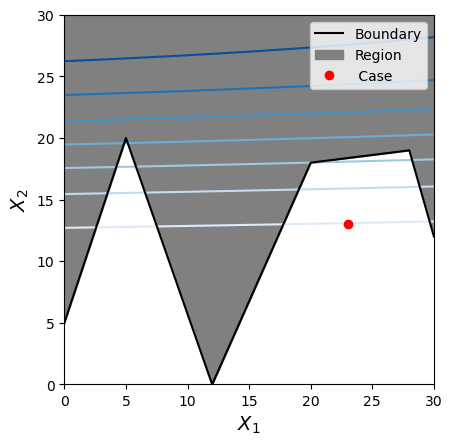

In [10]:
region_example = np.array([[0, 5, 12, 20, 28, 30],
                           [5, 20, 0, 18, 19, 12]])

plot_contour(bivar_dist, [0, 30, 0, 30],
             case=[23, 13],
             region=region_example);


<div style="background-color:#AABAB2; color: black; width: 95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

<b>Task 2.1 and 2.2:</b> create cells below to carry out the OR and AND calculations.
</p>
</div>

In [11]:
# YOUR_CODE_HERE
# DEFINITELY more than one line.
# probably several cells too ;)

<div style="background-color:#AABAB2; color: black; width: 95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

<b>Task 2.3:</b> create cells below to carry out the Case 3 calculations.

Note that in this case you need to make the plot to visualize the region over which we want to integrate. We need to define the boundary of the region of interest by solving the equation $Z(X_1,X_2)$ for $X_2$ when $Z=Z(x_{1,90},x_{2,90})$.
</p>
</div>

The equation can be defined as follows:

$$
\textrm{WRITE THE EQUATION HERE}
$$

which is then defined in Python and included in the `plot_contours` function as an array for the keyword argument `region`.

In [12]:
# YOUR_CODE_HERE
# DEFINITELY more than one line.
# probably several cells too ;)

<div style="background-color:#FAE99E; color: black; width: 95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Start of solution for Task 2.</b>
</p>
</div>

<div style="background-color:#facb8e; color: black; width: 95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px"> <p>Note: order of the tasks in this solution is not important.</p></div>

### Case 1 and 2

First we will compute the probabilities from the distribution.

Case 1 and 2 probabilities
     lower left:      0.82005
     left side:       0.90000
     bottom side:     0.90000
Case 1, Union:        0.17995
Case 2, Intersection: 0.02005


Case 1 and 2 empirical probabilities
     lower left:      0.99227
     left side:       0.99966
     bottom side:     0.99227
Case 1, Union:        0.00773
Case 2, Intersection: 0.00034




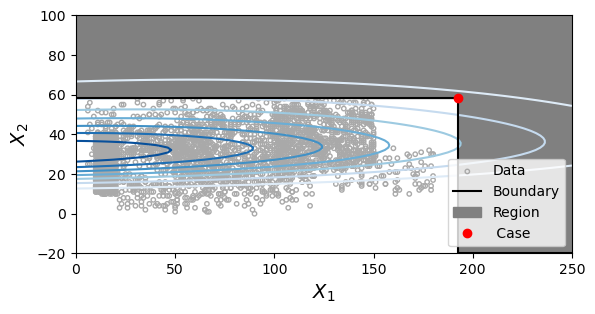

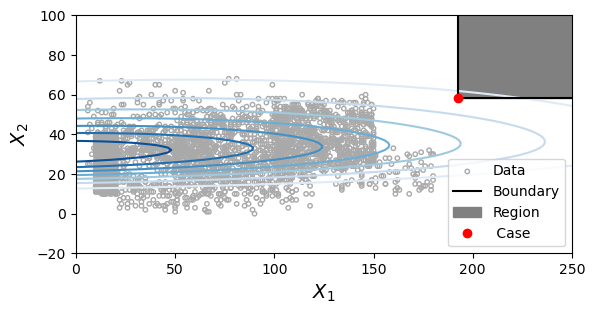

In [13]:
x90_1 = dist_x1.ppf(.9)
x90_2 = dist_x2.ppf(.9)

region_or = np.array([[bivariate_lim[0], x90_1, x90_1, bivariate_lim[1]],
                      [x90_2, x90_2, bivariate_lim[2], bivariate_lim[2]]])
region_and = np.array([[x90_1, x90_1, bivariate_lim[1]],
                       [bivariate_lim[3], x90_2, x90_2]])

lower_left = bivar_dist.cdf([x90_1, x90_2])
union = 1 - lower_left

left = dist_x1.cdf(x90_1)
bottom = dist_x2.cdf(x90_2)
intersection = 1 - (left + bottom - lower_left)

print(f'Case 1 and 2 probabilities')
print(f'     lower left:      {lower_left:.5f}')
print(f'     left side:       {left:.5f}')
print(f'     bottom side:     {bottom:.5f}')
print('=============================')
print(f'Case 1, Union:        {union:.5f}')
print(f'Case 2, Intersection: {intersection:.5f}')
print('\n')

# Case 1 and 2 empirical probabilities
N = data_x1.size

number_of_points_lower_left = sum((data_x1 < x90_1)&(data_x2 < x90_2))
lower_left = number_of_points_lower_left/(N + 1)
union = 1 - lower_left

left = sum(data_x1 < x90_1)/(N + 1)
bottom = sum(data_x2 < x90_2)/(N + 1)
intersection = 1 - (left + bottom - lower_left)

print(f'Case 1 and 2 empirical probabilities')
print(f'     lower left:      {lower_left:.5f}')
print(f'     left side:       {left:.5f}')
print(f'     bottom side:     {bottom:.5f}')
print('=============================')
print(f'Case 1, Union:        {union:.5f}')
print(f'Case 2, Intersection: {intersection:.5f}')
print('\n')

if make_figs:
    plot_contour(bivar_dist, bivariate_lim, data=data,
                region=region_or, case=[x90_1, x90_2])
    if save_figs:
        plt.savefig(os.path.join(figure_path,'figure_2.svg'))

if make_figs:
    plot_contour(bivar_dist, bivariate_lim, data=data,
                region=region_and, case=[x90_1, x90_2])
    if save_figs:
        plt.savefig(os.path.join(figure_path,'figure_3.svg'))

### Case 3

The Z function is defined at the top of this notebook in a solution code cell.

Z case MCS
N = 297600
The number of samples of Z < 0 is: 19961
This is 6.707% of all samples.
The MCS probability is 0.067.
The c.o.v. is of p is 0.007.


Z case empirical
N = 2976
The number of data where Z < 0 is: 0
This is 0.000% of all samples.
The empirical probability is 0.000.
The c.o.v. is of p is inf.




C:\Users\rlanzafame\AppData\Local\Temp\ipykernel_2124\4092762036.py:39: RuntimeWarning: divide by zero encountered in scalar divide
  print(f'The c.o.v. is of p is {1/np.sqrt((N+1)*p_Z90_data):.3f}.')


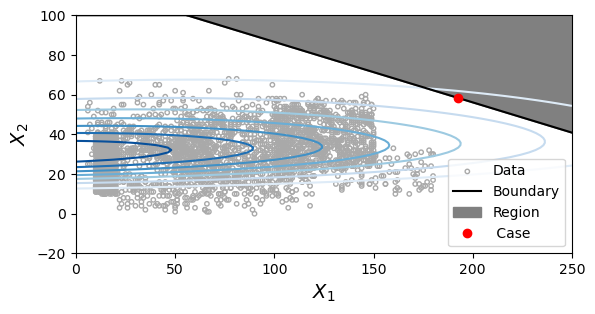

In [14]:
z_90 = Z(x90_1, x90_2)

plot_Z_x1 = np.linspace(bivariate_lim[0], bivariate_lim[1], 100)
plot_Z_x2 = plot_x2(plot_Z_x1, z_90)
region_Z = np.array([plot_Z_x1, plot_Z_x2])

if make_figs:
    plot_contour(bivar_dist, bivariate_lim, data=data,
                region=region_Z, case=[x90_1, x90_2])
    if save_figs:
        plt.savefig(os.path.join(figure_path,'figure_4.svg'))

sample_N = N_factor_MCS*N
sample = bivar_dist.rvs(size=sample_N)
sample_X1 = sample[:,0]
sample_X2 = sample[:,1]

sample_Z = Z(sample_X1, sample_X2)
Z_beyond_90 = sum(sample_Z>z_90)
p_Z90 = Z_beyond_90/(sample_N + 1)

print(f'Z case MCS')
print(f'N = {sample_N}')
print(f'The number of samples of Z < 0 is: {Z_beyond_90}')
print(f'This is {p_Z90*100:.3f}% of all samples.')
print(f'The MCS probability is {p_Z90:.3f}.')
print(f'The c.o.v. is of p is {1/np.sqrt((sample_N+1)*p_Z90):.3f}.')
print('\n')

empirical_Z = Z(data_x1, data_x2)
Z_data_beyond_90 = sum(empirical_Z>z_90)
p_Z90_data = Z_data_beyond_90/(N + 1)

print(f'Z case empirical')
print(f'N = {N}')
print(f'The number of data where Z < 0 is: {Z_data_beyond_90}')
print(f'This is {p_Z90_data*100:.3f}% of all samples.')
print(f'The empirical probability is {p_Z90_data:.3f}.')
print(f'The c.o.v. is of p is {1/np.sqrt((N+1)*p_Z90_data):.3f}.')
print('\n')

<div style="background-color:#facb8e; color: black; width: 95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px"> <p>Note: the bivariate figures are an important concept for the exam, so if using the code is too difficult for you to use when studying on your own, try sketching it on paper.</p></div>

<div style="background-color:#FAE99E; color: black; width: 95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>End of solution for Task 2.</b>
</p>
</div>

## Part 3: Validate Bivariate with Monte Carlo Simulation

Now that we have seen how the different cases give different values of probability, let's focus on the function of random variables. This is a more interesting case because we can use the samples of $Z$ to approximate the distribution $f_Z(z)$ and use the empirical distribution of $Z$ to help validate the bivariate model.

<div style="background-color:#AABAB2; color: black; width: 95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

$\textbf{Task 3:}$
    
Do the following:

- Use Monte Carlo Simulation to create a sample of $Z(X_1,X_2)$ and compare this distribution to the empirical distribution.</li>
- Write 2-3 sentences assessing the quality of the distribution from MCS, and whether the bivariate distribution is acceptable for this problem. Use qualitative and quantitative measures from last week to support your arguments.
    
</p>
<p>
    <em>Note: it would be interesting to fit a parametric distribution to the MCS sample, but it is not required for this assignment.</em>
</p>
</div>

<div style="background-color:#AABAB2; color: black; width: 95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

<b>Task 3.1:</b> Plot histograms of $Z$ based on the Monte Carlo samples, and based on the data. Note that you probably already computed the samples in Part 2.
</p>
</div>

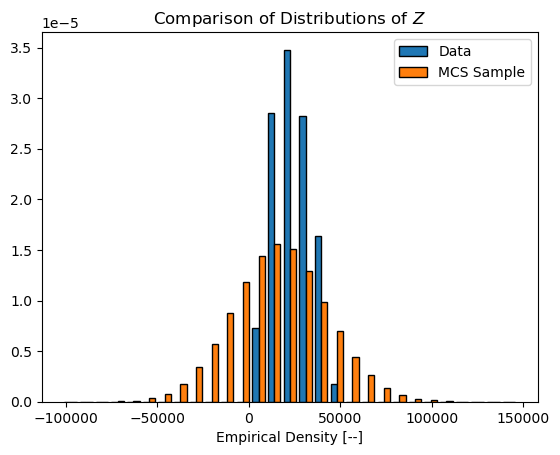

In [15]:
# plot_values = np.linspace(sample_Z.min(), sample_Z.max(), 30)
# fig, ax = plt.subplots(1)
# ax.hist([YOUR_CODE_HERE, YOUR_CODE_HERE],
#          bins=plot_values,
#          density=True,
#          edgecolor='black');
# ax.legend(['Data', 'MCS Sample'])
# ax.set_xlabel('$Z(X_1,X_2)$')
# ax.set_xlabel('Empirical Density [--]')
# ax.set_title('Comparison of Distributions of $Z$');

# SOLUTION
plot_values = np.linspace(sample_Z.min(), sample_Z.max(), 30)
fig, ax = plt.subplots(1)
ax.hist([empirical_Z, sample_Z],
         bins=plot_values,
         density=True,
         edgecolor='black');
ax.legend(['Data', 'MCS Sample'])
ax.set_xlabel('$Z(X_1,X_2)$')
ax.set_xlabel('Empirical Density [--]')
ax.set_title('Comparison of Distributions of $Z$');

<div style="background-color:#AABAB2; color: black; width: 95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

<b>Task 3.2:</b> Define a function to compute the ecdf.
</p>
</div>

In [16]:
# def ecdf(var):
#     x = YOUR_CODE_HERE # sort the values from small to large
#     n = YOUR_CODE_HERE # determine the number of datapoints
#     y = YOUR_CODE_HERE
#     return [y, x]

# SOLUTION:
def ecdf(var):
    x = np.sort(var) # sort the values from small to large
    n = x.size # determine the number of datapoints
    y = np.arange(1, n+1) / (n + 1)
    return [y, x]


<div style="background-color:#AABAB2; color: black; width: 95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

<b>Task 3.3:</b> Create a semi-log plot of the non-exceedance probability.
</p>
</div>

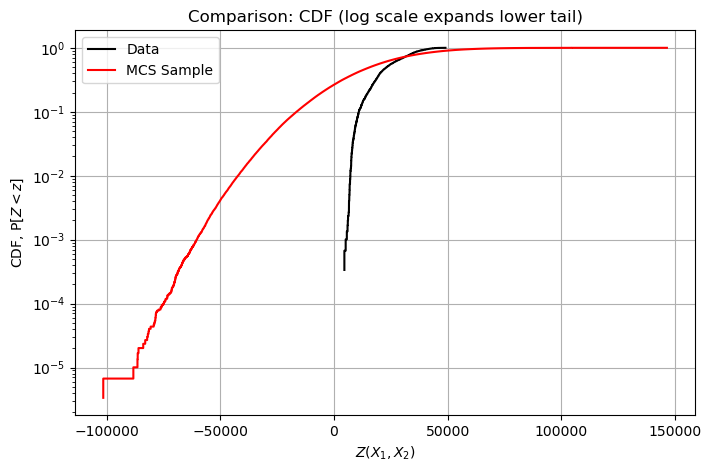

In [17]:
# fig, axes = plt.subplots(1, 1, figsize=(8, 5))

# axes.step(YOUR_CODE_HERE, YOUR_CODE_HERE, 
#           color='k', label='Data')
# axes.step(YOUR_CODE_HERE, YOUR_CODE_HERE,
#           color='r', label='MCS Sample')
# axes.set_xlabel('$Z(X_1,X_2)$')
# axes.set_ylabel('CDF, $\mathrm{P}[Z < z]$')
# axes.set_title('Comparison: CDF (log scale expands lower tail)')
# axes.set_yscale('log')
# axes.legend()
# axes.grid()

# SOLUTION
fig, axes = plt.subplots(1, 1, figsize=(8, 5))

axes.step(ecdf(empirical_Z)[1], ecdf(empirical_Z)[0], 
          color='k', label='Data')
axes.step(ecdf(sample_Z)[1], ecdf(sample_Z)[0],
          color='r', label='MCS Sample')
axes.set_xlabel('$Z(X_1,X_2)$')
axes.set_ylabel(r'CDF, $\mathrm{P}[Z < z]$')
axes.set_title('Comparison: CDF (log scale expands lower tail)')
axes.set_yscale('log')
axes.legend()
axes.grid()

<div style="background-color:#AABAB2; color: black; width: 95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>

<b>Task 3.4:</b> Create a semi-log plot of the exceedance probability.
</p>
</div>

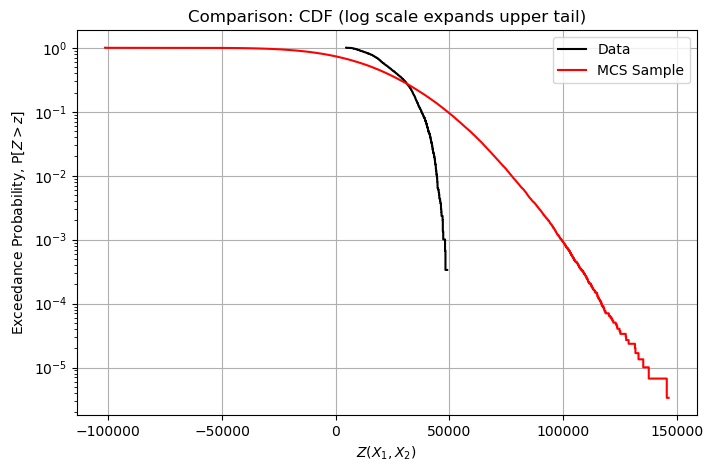

In [18]:
# fig, axes = plt.subplots(1, 1, figsize=(8, 5))

# axes.step(YOUR_CODE_HERE, YOUR_CODE_HERE, 
#           color='k', label='Data')
# axes.step(YOUR_CODE_HERE, YOUR_CODE_HERE,
#           color='r', label='MCS Sample')
# axes.set_xlabel('$Z(X_1,X_2)$')
# axes.set_ylabel('Exceedance Probability, $\mathrm{P}[Z > z]$')
# axes.set_title('Comparison: CDF (log scale expands upper tail)')
# axes.set_yscale('log')
# axes.legend()
# axes.grid()

# SOLUTION
fig, axes = plt.subplots(1, 1, figsize=(8, 5))

axes.step(ecdf(empirical_Z)[1], 1-ecdf(empirical_Z)[0], 
          color='k', label='Data')
axes.step(ecdf(sample_Z)[1], 1-ecdf(sample_Z)[0],
          color='r', label='MCS Sample')
axes.set_xlabel('$Z(X_1,X_2)$')
axes.set_ylabel(r'Exceedance Probability, $\mathrm{P}[Z > z]$')
axes.set_title('Comparison: CDF (log scale expands upper tail)')
axes.set_yscale('log')
axes.legend()
axes.grid()

<div style="background-color:#facb8e; color: black; width: 95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px"><p>In case you are wondering, the data for this exercise was computed with a Clayton Copula. A Copula is a useful way of modelling non-linear dependence. If you would like to learn more about this, you should consider the 2nd year cross-over module CEGM2005 Probabilistic Modelling of real-world phenomena through ObseRvations and Elicitation (MORE).</p></div>

**End of notebook.**
<h2 style="height: 60px">
</h2>
<h3 style="position: absolute; display: flex; flex-grow: 0; flex-shrink: 0; flex-direction: row-reverse; bottom: 60px; right: 50px; margin: 0; border: 0">
    <style>
        .markdown {width:100%; position: relative}
        article { position: relative }
    </style>
    <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">
      <img alt="Creative Commons License" style="border-width:; width:88px; height:auto; padding-top:10px" src="https://i.creativecommons.org/l/by/4.0/88x31.png" />
    </a>
    <a rel="TU Delft" href="https://www.tudelft.nl/en/ceg">
      <img alt="TU Delft" style="border-width:0; width:100px; height:auto; padding-bottom:0px" src="https://gitlab.tudelft.nl/mude/public/-/raw/main/tu-logo/TU_P1_full-color.png" />
    </a>
    <a rel="MUDE" href="http://mude.citg.tudelft.nl/">
      <img alt="MUDE" style="border-width:0; width:100px; height:auto; padding-bottom:0px" src="https://gitlab.tudelft.nl/mude/public/-/raw/main/mude-logo/MUDE_Logo-small.png" />
    </a>
    
</h3>
<span style="font-size: 75%">
&copy; Copyright 2024 <a rel="MUDE" href="http://mude.citg.tudelft.nl/">MUDE</a> TU Delft. This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">CC BY 4.0 License</a>.